<h1 style="text-align:center;font-size:200%;;">Black Hole Optimization Algorithm</h1>
<h4 style="text-align:center;">Réaliser par  :  DAGHMOUMI Marouan </h4>
<h4 style="text-align:center;">Encadré par  : Pr. JEBARI Khalid</h4>
<img src="Img/img_1.png" alt="FST Logo" width="1700" height="1000" >

## Définition
L'Algorithme d'Optimisation du Trou Noir (AOTN) est une méthode d'optimisation métaheuristique inspirée du phénomène astrophysique des trous noirs. Cet algorithme simule l'interaction entre les étoiles et un trou noir dans l'univers.

## Principe

L'AOTN fonctionne en initialisant une population d'étoiles (solutions candidates) et un trou noir (la meilleure solution). Les étoiles sont attirées par le trou noir et se déplacent vers lui. Si une étoile franchit l'horizon des événements du trou noir, elle est "absorbée" et remplacée par une nouvelle étoile générée aléatoirement.

## Étapes

### 1. Initialisation

Générer une population initiale d'étoiles de manière aléatoire. Chaque étoile représente une solution potentielle au problème d'optimisation.

$\[ \mathbf{X}_i = \mathbf{X}_{\min} + \mathbf{r}_i (\mathbf{X}_{\max} - \mathbf{X}_{\min}) \]$

- $\(\mathbf{X}_i\)$ : Position de la \(i\)-ème étoile.
- $\(\mathbf{X}_{\min}\)$ : Limite inférieure de l'espace de recherche.
- $\(\mathbf{X}_{\max}\)$ : Limite supérieure de l'espace de recherche.
- $\(\mathbf{r}_i\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 2. Évaluation

Évaluer la fitness de chaque étoile en utilisant la fonction objectif du problème d'optimisation.

$\[ f_i = f(\mathbf{X}_i) \]$

- $\(f_i\)$ : Fitness de la \(i\)-ème étoile.
- $\(f(\cdot)\)$ : Fonction objectif.

### 3. Sélection du Trou Noir

Sélectionner l'étoile avec la meilleure fitness comme étant le trou noir.

$\[ \mathbf{X}_{\text{TrouNoir}} = \arg \min_{\mathbf{X}_i} f(\mathbf{X}_i) \]$

### 4. Calcul du Rayon de l'Horizon des Événements

Calculer le rayon de l'horizon des événements du trou noir.

$\[ R = \frac{f_{\text{TrouNoir}}}{\sum_{i=1}^N f_i} \]$

- $\(R\)$ : Rayon de l'horizon des événements.
- $\(f_{\text{TrouNoir}}\)$ : Fitness du trou noir.
- $\(N\)$ : Nombre total d'étoiles.

### 5. Mise à jour des Positions des Étoiles

Mettre à jour la position de chaque étoile en l'attirant vers le trou noir.

$\[ \mathbf{X}_i^{\text{nouveau}} = \mathbf{X}_i + \mathbf{r} \cdot (\mathbf{X}_{\text{TrouNoir}} - \mathbf{X}_i) \]$

- $\(\mathbf{X}_i^{\text{nouveau}}\)$ : Nouvelle position de la \(i\)-ème étoile.
- $\(\mathbf{r}\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 6. Absorption et Régénération

Si une étoile franchit l'horizon des événements (c'est-à-dire si sa distance au trou noir est inférieure à $\(R\)$), elle est absorbée et une nouvelle étoile est générée aléatoirement pour la remplacer.

### 7. Terminaison

Si les critères d'arrêt sont atteints (par exemple, nombre maximum d'itérations atteint, solution suffisamment bonne), arrêter l'algorithme et renvoyer la position du trou noir comme meilleure solution. Sinon, retourner à l'étape 2.

L'AOTN est particulièrement efficace pour les problèmes d'optimisation globale et peut s'adapter à une variété de domaines d'application. Son principal avantage réside dans sa capacité à équilibrer l'exploration de l'espace de recherche et l'exploitation des meilleures solutions trouvées.


<img src="Img/chart_black.png" alt="FST Logo" width="1000" height="1500" >

<h1 style="text-align:center;font-size:200%;;">Principe</h1>

/var/folders/f9/l861j34x6435fvkrx5d05bmc0000gn/T/ipykernel_2978/1728568610.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


Meilleure solution trouvée: [0.97523691 2.04913745]
Meilleure fitness: 5.7436773531498435


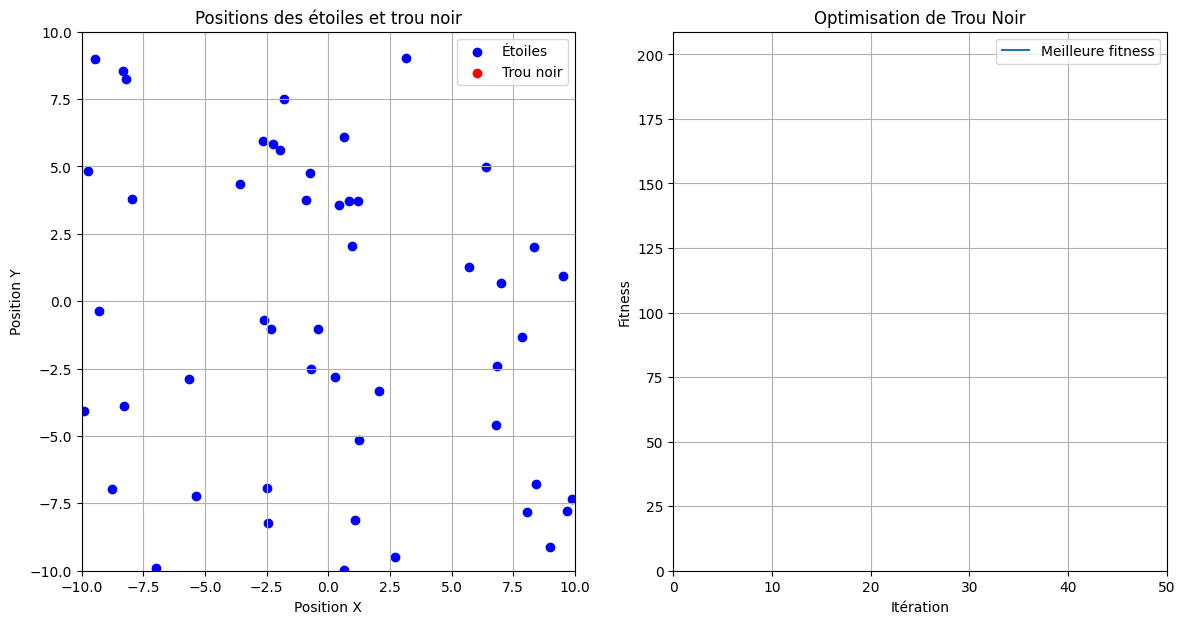

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Button, VBox, Output
import IPython.display as display

# Fonction objectif à minimiser (ici, la somme des carrés des composantes du vecteur)
def objective_function(x):
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Initialisation de la population avec des valeurs aléatoires dans les bornes spécifiées
def initialize_population(pop_size, dimensions, lower_bound, upper_bound):
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dimensions))
    return population

# Évaluation de la fitness de chaque individu dans la population
def evaluate_fitness(population):
    fitness = np.apply_along_axis(objective_function, 1, population)
    return fitness

# Trouver le meilleur individu dans la population (trou noir)
def find_black_hole(population, fitness):
    best_fitness_idx = np.argmin(fitness)
    black_hole = population[best_fitness_idx].copy()
    black_hole_fitness = fitness[best_fitness_idx]
    return black_hole, black_hole_fitness

# Mettre à jour les positions des individus dans la population
def update_positions(population, black_hole, lower_bound, upper_bound):
    new_population = population + np.random.rand(population.shape[0], population.shape[1]) * (black_hole - population)
    new_population = np.clip(new_population, lower_bound, upper_bound)
    return new_population

# Calculer l'horizon des événements du trou noir
def calculate_event_horizon(black_hole_fitness, fitness):
    return black_hole_fitness / np.sum(fitness)

# Vérifier si les individus sont dans l'horizon des événements
def check_event_horizon(population, black_hole, event_horizon):
    distances = np.linalg.norm(population - black_hole, axis=1)
    in_event_horizon = distances < event_horizon
    return in_event_horizon

# Remplacer les individus se trouvant dans l'horizon des événements par de nouveaux individus
def replace_in_event_horizon(population, in_event_horizon, lower_bound, upper_bound):
    new_individuals = np.random.uniform(lower_bound, upper_bound, (np.sum(in_event_horizon), population.shape[1]))
    population[in_event_horizon] = new_individuals
    return population

# Paramètres de l'algorithme
pop_size = 50
dimensions = 2
lower_bound = -10
upper_bound = 10
max_iter = 50

# Initialisation de la population et évaluation de la fitness
population = initialize_population(pop_size, dimensions, lower_bound, upper_bound)
fitness = evaluate_fitness(population)

# Configuration de la figure pour la visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_xlim(lower_bound, upper_bound)
ax1.set_ylim(lower_bound, upper_bound)
ax2.set_xlim(0, max_iter)
ax2.set_ylim(0, np.max(fitness) * 1.1)
ax1.set_xlabel('Position X')
ax1.set_ylabel('Position Y')
ax2.set_xlabel('Itération')
ax2.set_ylabel('Fitness')
ax1.set_title('Positions des étoiles et trou noir')
ax2.set_title('Optimisation de Trou Noir')
ax1.grid(True)
ax2.grid(True)

# Scatter plot pour les positions des étoiles et du trou noir
stars_scatter = ax1.scatter(population[:, 0], population[:, 1], c='blue', label='Étoiles')
black_hole_scatter = ax1.scatter([], [], c='red', label='Trou noir')
ax2.legend()
ax1.legend()

# Plot pour la meilleure fitness
ax_fitness, = ax2.plot([], [], label='Meilleure fitness')
ax2.legend()

# Widget output pour afficher les graphiques et les tables
output = Output()

# Variables pour stocker les résultats de fitness, positions et horizons des événements
fitness_results = []
position_results = []
event_horizon_results = []

# Fonction pour exécuter une itération de l'algorithme
def run_iteration(b):
    global population, fitness, fitness_results, position_results, event_horizon_results

    # Trouver le trou noir (meilleur individu)
    black_hole, black_hole_fitness = find_black_hole(population, fitness)
    # Mettre à jour les positions des individus
    population = update_positions(population, black_hole, lower_bound, upper_bound)
    # Réévaluer la fitness de la population
    fitness = evaluate_fitness(population)
    # Calculer l'horizon des événements
    event_horizon = calculate_event_horizon(black_hole_fitness, fitness)
    # Vérifier quels individus sont dans l'horizon des événements
    in_event_horizon = check_event_horizon(population, black_hole, event_horizon)
    # Remplacer les individus dans l'horizon des événements par de nouveaux individus
    population = replace_in_event_horizon(population, in_event_horizon, lower_bound, upper_bound)
    # Réévaluer la fitness de la population
    fitness = evaluate_fitness(population)

    # Mise à jour du scatter plot
    stars_scatter.set_offsets(population)
    black_hole_scatter.set_offsets([black_hole])
    
    # Stocker les résultats
    fitness_results.append(fitness.copy())
    position_results.append(population.copy())
    event_horizon_results.append(event_horizon)

    with output:
        display.clear_output(wait=True)
        display.display(fig)

    # Afficher les résultats dans une table
    fitness_df = pd.DataFrame(fitness_results, columns=[f'Individu {i}' for i in range(pop_size)])
    position_df = pd.DataFrame(position_results[-1], columns=['Position X', 'Position Y'])
    event_horizon_df = pd.DataFrame(event_horizon_results, columns=['Event Horizon'])

    with output:
        display.clear_output(wait=True)
        display.display(fig)
        display.display(fitness_df)
        display.display(position_df)
        display.display(event_horizon_df)

# Bouton pour aller à l'itération suivante
button = Button(description="Itération suivante")
button.on_click(run_iteration)

# Afficher le bouton et la sortie du graphique
display.display(VBox([button, output]))

# Affichage de la meilleure solution finale
print("Meilleure solution trouvée:", population[np.argmin(fitness)])
print("Meilleure fitness:", np.min(fitness))

/var/folders/f9/l861j34x6435fvkrx5d05bmc0000gn/T/ipykernel_2978/2258546404.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


Meilleure solution trouvée: [-3.62045630e-09 -5.75824556e-10]
Meilleure fitness: 0.0


Output()

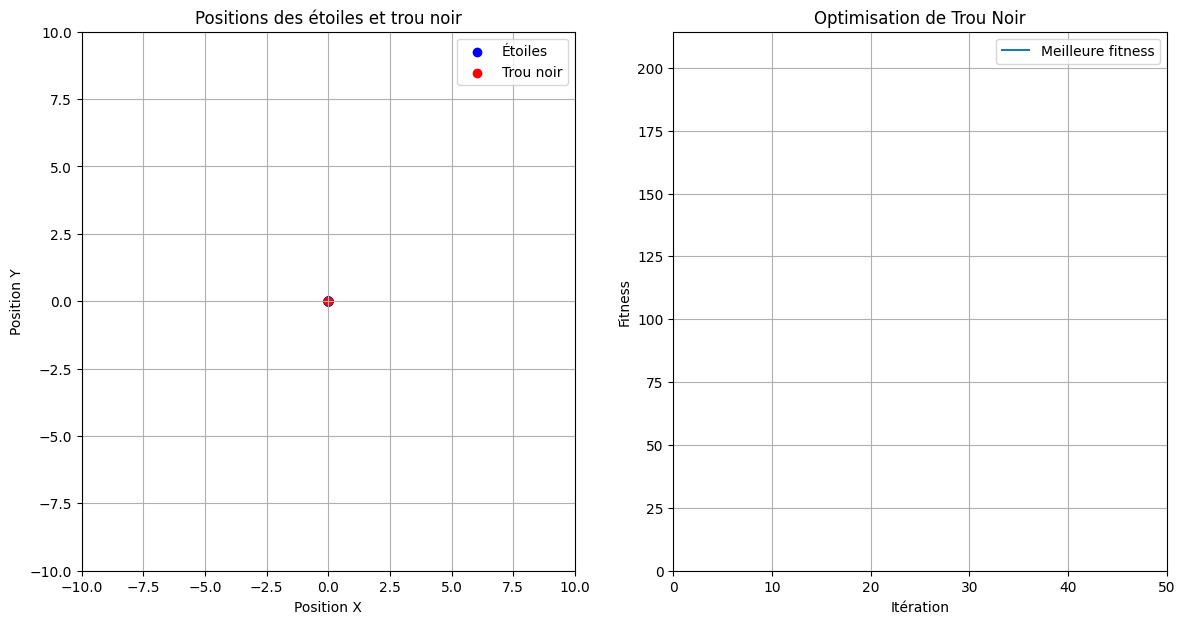

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Output
import IPython.display as display

# Fonction objectif à minimiser (ici, la somme des carrés des composantes du vecteur)
def objective_function(x):
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Initialisation de la population avec des valeurs aléatoires dans les bornes spécifiées
def initialize_population(pop_size, dimensions, lower_bound, upper_bound):
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dimensions))
    return population

# Évaluation de la fitness de chaque individu dans la population
def evaluate_fitness(population):
    fitness = np.apply_along_axis(objective_function, 1, population)
    return fitness

# Trouver le meilleur individu dans la population (trou noir)
def find_black_hole(population, fitness):
    best_fitness_idx = np.argmin(fitness)
    black_hole = population[best_fitness_idx].copy()
    black_hole_fitness = fitness[best_fitness_idx]
    return black_hole, black_hole_fitness

# Mettre à jour les positions des individus dans la population
def update_positions(population, black_hole, lower_bound, upper_bound):
    new_population = population + np.random.rand(population.shape[0], population.shape[1]) * (black_hole - population)
    new_population = np.clip(new_population, lower_bound, upper_bound)
    return new_population

# Calculer l'horizon des événements du trou noir
def calculate_event_horizon(black_hole_fitness, fitness):
    return black_hole_fitness / np.sum(fitness)

# Vérifier si les individus sont dans l'horizon des événements
def check_event_horizon(population, black_hole, event_horizon):
    distances = np.linalg.norm(population - black_hole, axis=1)
    in_event_horizon = distances < event_horizon
    return in_event_horizon

# Remplacer les individus se trouvant dans l'horizon des événements par de nouveaux individus
def replace_in_event_horizon(population, in_event_horizon, lower_bound, upper_bound):
    new_individuals = np.random.uniform(lower_bound, upper_bound, (np.sum(in_event_horizon), population.shape[1]))
    population[in_event_horizon] = new_individuals
    return population

# Paramètres de l'algorithme
pop_size = 50
dimensions = 2
lower_bound = -10
upper_bound = 10
max_iter = 50

# Initialisation de la population et évaluation de la fitness
population = initialize_population(pop_size, dimensions, lower_bound, upper_bound)
fitness = evaluate_fitness(population)

# Configuration de la figure pour la visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_xlim(lower_bound, upper_bound)
ax1.set_ylim(lower_bound, upper_bound)
ax2.set_xlim(0, max_iter)
ax2.set_ylim(0, np.max(fitness) * 1.1)
ax1.set_xlabel('Position X')
ax1.set_ylabel('Position Y')
ax2.set_xlabel('Itération')
ax2.set_ylabel('Fitness')
ax1.set_title('Positions des étoiles et trou noir')
ax2.set_title('Optimisation de Trou Noir')
ax1.grid(True)
ax2.grid(True)

# Scatter plot pour les positions des étoiles et du trou noir
stars_scatter = ax1.scatter(population[:, 0], population[:, 1], c='blue', label='Étoiles')
black_hole_scatter = ax1.scatter([], [], c='red', label='Trou noir')
ax2.legend()
ax1.legend()

# Plot pour la meilleure fitness
ax_fitness, = ax2.plot([], [], label='Meilleure fitness')
ax2.legend()

# Widget output pour afficher les graphiques et les tables
output = Output()

# Variables pour stocker les résultats de fitness, positions et horizons des événements
fitness_results = []
position_results = []
event_horizon_results = []

# Fonction pour exécuter toutes les itérations de l'algorithme
def run_iterations():
    global population, fitness, fitness_results, position_results, event_horizon_results

    for iteration in range(max_iter):
        # Trouver le trou noir (meilleur individu)
        black_hole, black_hole_fitness = find_black_hole(population, fitness)
        # Mettre à jour les positions des individus
        population = update_positions(population, black_hole, lower_bound, upper_bound)
        # Réévaluer la fitness de la population
        fitness = evaluate_fitness(population)
        # Calculer l'horizon des événements
        event_horizon = calculate_event_horizon(black_hole_fitness, fitness)
        # Vérifier quels individus sont dans l'horizon des événements
        in_event_horizon = check_event_horizon(population, black_hole, event_horizon)
        # Remplacer les individus dans l'horizon des événements par de nouveaux individus
        population = replace_in_event_horizon(population, in_event_horizon, lower_bound, upper_bound)
        # Réévaluer la fitness de la population
        fitness = evaluate_fitness(population)

        # Mise à jour du scatter plot
        stars_scatter.set_offsets(population)
        black_hole_scatter.set_offsets([black_hole])
        
        # Stocker les résultats
        fitness_results.append(fitness.copy())
        position_results.append(population.copy())
        event_horizon_results.append(event_horizon)

        with output:
            display.clear_output(wait=True)
            display.display(fig)

    # Afficher les résultats dans une table
    fitness_df = pd.DataFrame(fitness_results, columns=[f'Individu {i}' for i in range(pop_size)])
    position_df = pd.DataFrame(position_results[-1], columns=['Position X', 'Position Y'])
    event_horizon_df = pd.DataFrame(event_horizon_results, columns=['Event Horizon'])

    with output:
        display.display(fig)
        display.display(fitness_df)
        display.display(position_df)
        display.display(event_horizon_df)

    # Debug information
    print("Meilleure solution trouvée:", population[np.argmin(fitness)])
    print("Meilleure fitness:", np.min(fitness))

# Exécution des itérations
run_iterations()

# Afficher le graphique
display.display(output)


<h1 style="text-align:center;font-size:200%;">TSP problem</h1>

/var/folders/f9/l861j34x6435fvkrx5d05bmc0000gn/T/ipykernel_2978/2100898062.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


Coordonnées des villes:
 [[24.94367051 86.57279135]
 [21.35803063 93.22622651]
 [70.20559398 88.35447642]
 [12.76396153 88.21817702]
 [ 6.35820381 97.75319693]
 [ 7.79402483 82.54503017]
 [21.64144612 63.58428342]
 [11.63801255  9.13731026]
 [ 9.19591433 31.11230964]
 [29.05914031 12.59875061]]
Meilleur tour trouvé:
 [5 8 7 9 6 0 1 2 3 4 5]
Distance totale pour le meilleur tour: 306.92311190172205


Output()

Meilleure solution trouvée: [5 8 7 9 6 0 1 2 3 4]
Meilleure fitness: 306.92311190172205


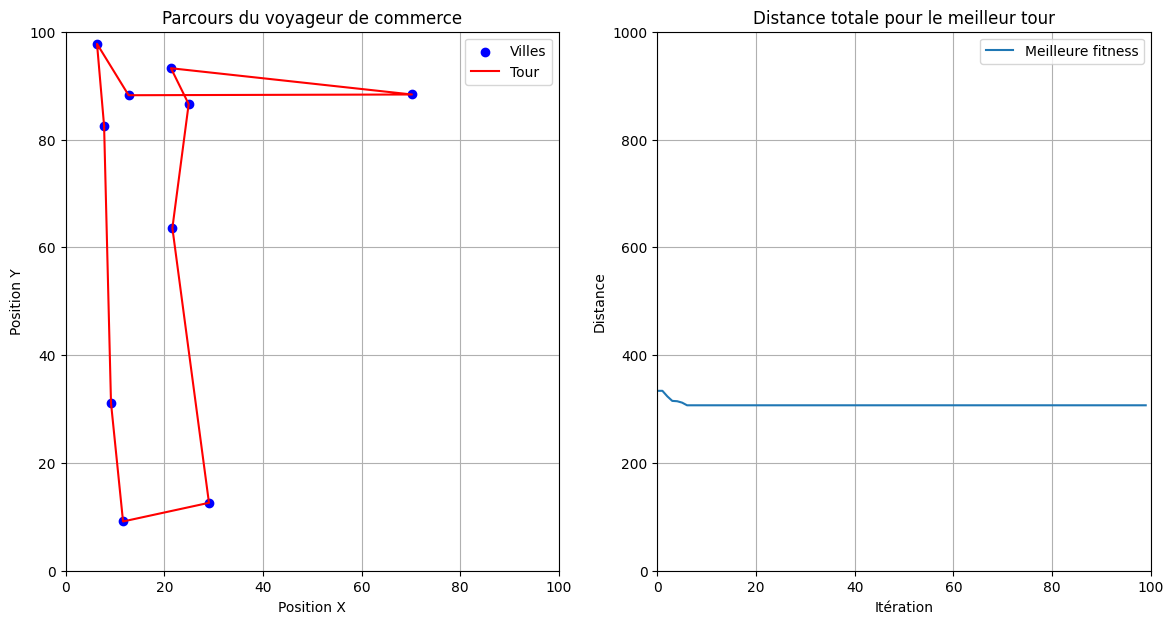

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Output
import IPython.display as display

# Génération des coordonnées des villes
def generate_cities(num_cities, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, (num_cities, 2))

# Calcul de la distance totale pour une solution (permutation des villes)
def total_distance(solution, cities):
    distance = 0
    for i in range(len(solution)):
        distance += np.linalg.norm(cities[solution[i]] - cities[solution[i-1]])
    return distance

# Initialisation de la population (permutations aléatoires)
def initialize_population(pop_size, num_cities):
    population = [np.random.permutation(num_cities) for _ in range(pop_size)]
    return np.array(population)

# Évaluation de la fitness de la population
def evaluate_fitness(population, cities):
    fitness = np.array([total_distance(ind, cities) for ind in population])
    return fitness

# Trouver le trou noir (meilleure solution)
def find_black_hole(population, fitness):
    best_fitness_idx = np.argmin(fitness)  # Trouver l'indice de la meilleure fitness
    black_hole = population[best_fitness_idx].copy()  # Copier la meilleure solution
    black_hole_fitness = fitness[best_fitness_idx]  # Obtenir la meilleure fitness
    return black_hole, black_hole_fitness

# Mettre à jour les positions (permutations)
def update_positions(population, black_hole):
    new_population = []
    for individual in population:
        new_individual = individual.copy()
        for i in range(len(individual)):
            if np.random.rand() < 0.5:  # Probabilité de 50% de swap
                idx = np.where(individual == black_hole[i])[0][0]
                new_individual[i], new_individual[idx] = new_individual[idx], new_individual[i]
        new_population.append(new_individual)
    return np.array(new_population)

# Calculer l'horizon des événements
def calculate_event_horizon(black_hole_fitness, fitness):
    return black_hole_fitness / np.sum(fitness)

# Vérifier l'horizon des événements
def check_event_horizon(population, black_hole, event_horizon, cities):
    distances = np.array([total_distance(ind, cities) for ind in population])
    in_event_horizon = distances < event_horizon
    return in_event_horizon

# Remplacer les individus dans l'horizon des événements
def replace_in_event_horizon(population, in_event_horizon, num_cities):
    for i in range(len(population)):
        if in_event_horizon[i]:
            population[i] = np.random.permutation(num_cities)
    return population

# Paramètres de l'algorithme
pop_size = 100  # Taille de la population
num_cities = 10  # Nombre de villes
lower_bound = 0  # Limite inférieure des coordonnées des villes
upper_bound = 100  # Limite supérieure des coordonnées des villes
max_iter = 100  # Nombre maximal d'itérations

# Génération des villes et initialisation de la population
cities = generate_cities(num_cities, lower_bound, upper_bound)
population = initialize_population(pop_size, num_cities)
fitness = evaluate_fitness(population, cities)

# Variables pour suivre la meilleure fitness à chaque itération
best_fitness_values = []

# Configuration de la figure pour la visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_xlim(lower_bound, upper_bound)
ax1.set_ylim(lower_bound, upper_bound)
ax2.set_xlim(0, max_iter)
ax2.set_ylim(0, max(np.max(fitness), 1000))
ax1.set_xlabel('Position X')
ax1.set_ylabel('Position Y')
ax2.set_xlabel('Itération')
ax2.set_ylabel('Distance')
ax1.set_title('Parcours du voyageur de commerce')
ax2.set_title('Distance totale pour le meilleur tour')
ax1.grid(True)
ax2.grid(True)

# Scatter plot for cities
cities_scatter = ax1.scatter(cities[:, 0], cities[:, 1], c='blue', label='Villes')
tour_lines, = ax1.plot([], [], 'r-', label='Tour')
ax2.legend()
ax1.legend()

# Plot for fitness
ax_fitness, = ax2.plot([], [], label='Meilleure fitness')
ax2.legend()

output = Output()

# Variables pour stocker les résultats
fitness_results = []
position_results = []
event_horizon_results = []

# Fonction pour exécuter toutes les itérations
def run_iterations():
    global population, fitness, best_fitness_values, fitness_results, position_results, event_horizon_results

    for iteration in range(max_iter):
        black_hole, black_hole_fitness = find_black_hole(population, fitness)  # Trouver le trou noir
        population = update_positions(population, black_hole)  # Mettre à jour les positions
        fitness = evaluate_fitness(population, cities)  # Réévaluer la fitness
        event_horizon = calculate_event_horizon(black_hole_fitness, fitness)  # Calculer l'horizon des événements
        in_event_horizon = check_event_horizon(population, black_hole, event_horizon, cities)  # Vérifier les individus dans l'horizon des événements
        population = replace_in_event_horizon(population, in_event_horizon, num_cities)  # Remplacer les individus dans l'horizon des événements
        fitness = evaluate_fitness(population, cities)  # Réévaluer la fitness

        best_fitness_values.append(black_hole_fitness)  # Ajouter la meilleure fitness actuelle à la liste
        ax_fitness.set_data(range(len(best_fitness_values)), best_fitness_values)  # Mettre à jour les données du graphique de fitness
        ax2.relim()
        ax2.autoscale_view()

        # Mettre à jour le tracé du tour
        best_tour = np.append(black_hole, black_hole[0])  # Ajouter la première ville à la fin pour boucler le tour
        tour_lines.set_data(cities[best_tour, 0], cities[best_tour, 1])

        # Stocker les résultats
        fitness_results.append(fitness.tolist())
        position_results.append(population.tolist())
        event_horizon_results.append(event_horizon)

        with output:
            display.clear_output(wait=True)
            display.display(fig)

    # Afficher les résultats dans une table
    fitness_df = pd.DataFrame(fitness_results, columns=[f'Individu {i}' for i in range(pop_size)])
    position_df = pd.DataFrame(position_results, columns=[f'Position {i}' for i in range(pop_size)])
    event_horizon_df = pd.DataFrame(event_horizon_results, columns=['Event Horizon'])

    with output:
        display.display(fitness_df)
        display.display(position_df)
        display.display(event_horizon_df)

    # Debug information
    print("Coordonnées des villes:\n", cities)
    print("Meilleur tour trouvé:\n", best_tour)
    print("Distance totale pour le meilleur tour:", black_hole_fitness)

# Exécution des itérations
run_iterations()

# Afficher le bouton et la sortie du graphique
display.display(output)

# Affichage de la meilleure solution finale
print("Meilleure solution trouvée:", population[np.argmin(fitness)])
print("Meilleure fitness:", np.min(fitness))


<h1 style="text-align:center;font-size:200%;">benchmark</h1>

In [1]:
import numpy as np
import pandas as pd

# Fonction de Rastrigin comme fonction objectif
def rastrigin_function(x):
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Fonction de Sphere comme fonction objectif
def sphere_function(x):
    return np.sum(x**2)

# Initialisation de la population
def initialize_population(pop_size, dimensions, lower_bound, upper_bound):
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dimensions))
    return population

# Évaluation de la fitness de la population
def evaluate_fitness(population, objective_function):
    fitness = np.apply_along_axis(objective_function, 1, population)
    return fitness

# Trouver le trou noir (meilleure solution)
def find_black_hole(population, fitness):
    best_fitness_idx = np.argmin(fitness)
    black_hole = population[best_fitness_idx].copy()
    black_hole_fitness = fitness[best_fitness_idx]
    return black_hole, black_hole_fitness

# Mettre à jour les positions
def update_positions(population, black_hole, lower_bound, upper_bound):
    new_population = population + np.random.rand(population.shape[0], population.shape[1]) * (black_hole - population)
    new_population = np.clip(new_population, lower_bound, upper_bound)
    return new_population

# Calculer l'horizon des événements
def calculate_event_horizon(black_hole_fitness, fitness):
    return black_hole_fitness / np.sum(fitness)

# Vérifier l'horizon des événements
def check_event_horizon(population, black_hole, event_horizon):
    distances = np.linalg.norm(population - black_hole, axis=1)
    in_event_horizon = distances < event_horizon
    return in_event_horizon

# Remplacer les individus dans l'horizon des événements
def replace_in_event_horizon(population, in_event_horizon, lower_bound, upper_bound):
    new_individuals = np.random.uniform(lower_bound, upper_bound, (np.sum(in_event_horizon), population.shape[1]))
    population[in_event_horizon] = new_individuals
    return population

# Paramètres de l'algorithme
pop_size = 1000
dimensions = 2
lower_bound = -10
upper_bound = 10
max_iter = 100

# Initialisation de la population pour les deux fonctions de référence
population_rastrigin = initialize_population(pop_size, dimensions, lower_bound, upper_bound)
population_sphere = initialize_population(pop_size, dimensions, lower_bound, upper_bound)

# Évaluation de la fitness initiale pour les deux fonctions de référence
fitness_rastrigin = evaluate_fitness(population_rastrigin, rastrigin_function)
fitness_sphere = evaluate_fitness(population_sphere, sphere_function)

# Variables pour stocker la meilleure fitness à chaque itération
best_fitness_values_rastrigin = []
best_fitness_values_sphere = []

# Fonction pour exécuter toutes les itérations de l'algorithme
def run_iterations():
    global population_rastrigin, fitness_rastrigin, best_fitness_values_rastrigin
    global population_sphere, fitness_sphere, best_fitness_values_sphere

    for iteration in range(max_iter):
        # Optimisation pour la fonction de Rastrigin
        black_hole_rastrigin, black_hole_fitness_rastrigin = find_black_hole(population_rastrigin, fitness_rastrigin)
        population_rastrigin = update_positions(population_rastrigin, black_hole_rastrigin, lower_bound, upper_bound)
        fitness_rastrigin = evaluate_fitness(population_rastrigin, rastrigin_function)
        event_horizon_rastrigin = calculate_event_horizon(black_hole_fitness_rastrigin, fitness_rastrigin)
        in_event_horizon_rastrigin = check_event_horizon(population_rastrigin, black_hole_rastrigin, event_horizon_rastrigin)
        population_rastrigin = replace_in_event_horizon(population_rastrigin, in_event_horizon_rastrigin, lower_bound, upper_bound)
        fitness_rastrigin = evaluate_fitness(population_rastrigin, rastrigin_function)
        best_fitness_values_rastrigin.append(np.min(fitness_rastrigin))
        
        # Optimisation pour la fonction de Sphere
        black_hole_sphere, black_hole_fitness_sphere = find_black_hole(population_sphere, fitness_sphere)
        population_sphere = update_positions(population_sphere, black_hole_sphere, lower_bound, upper_bound)
        fitness_sphere = evaluate_fitness(population_sphere, sphere_function)
        event_horizon_sphere = calculate_event_horizon(black_hole_fitness_sphere, fitness_sphere)
        in_event_horizon_sphere = check_event_horizon(population_sphere, black_hole_sphere, event_horizon_sphere)
        population_sphere = replace_in_event_horizon(population_sphere, in_event_horizon_sphere, lower_bound, upper_bound)
        fitness_sphere = evaluate_fitness(population_sphere, sphere_function)
        best_fitness_values_sphere.append(np.min(fitness_sphere))

    # Afficher les résultats dans une table
    fitness_df_rastrigin = pd.DataFrame(fitness_rastrigin, columns=['Fitness'])
    fitness_df_sphere = pd.DataFrame(fitness_sphere, columns=['Fitness'])
    position_df_rastrigin = pd.DataFrame(population_rastrigin, columns=[f'Position {i}' for i in range(dimensions)])
    position_df_sphere = pd.DataFrame(population_sphere, columns=[f'Position {i}' for i in range(dimensions)])

    display(fitness_df_rastrigin)
    display(fitness_df_sphere)
    display(position_df_rastrigin)
    display(position_df_sphere)

    # Debug information
    print("Meilleure solution pour Rastrigin:", population_rastrigin[np.argmin(fitness_rastrigin)])
    print("Meilleure fitness pour Rastrigin:", np.min(fitness_rastrigin))
    print("Meilleure solution pour Sphere:", population_sphere[np.argmin(fitness_sphere)])
    print("Meilleure fitness pour Sphere:", np.min(fitness_sphere))

# Exécution des itérations
run_iterations()


/var/folders/f9/l861j34x6435fvkrx5d05bmc0000gn/T/ipykernel_3233/4020233227.py:39: RuntimeWarning: invalid value encountered in scalar divide
  return black_hole_fitness / np.sum(fitness)


,Fitness
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
998,0.0


,Fitness
0,8.555901e+00
1,4.412340e-73
2,1.401402e-78
3,1.117482e-68
4,3.398272e-32
...,...
995,3.770843e-70
996,5.153834e-78
997,2.385025e-65
998,1.160650e-80


,Position 0,Position 1
0,7.016796e-11,-3.357083e-09
1,7.016796e-11,-3.357083e-09
2,7.016796e-11,-3.357083e-09
3,7.016796e-11,-3.357083e-09
4,7.016796e-11,-3.357083e-09
...,...,...
995,7.016796e-11,-3.357083e-09
996,7.016796e-11,-3.357083e-09
997,7.016796e-11,-3.357083e-09
998,7.016796e-11,-3.357083e-09


,Position 0,Position 1
0,2.859389e+00,-6.162735e-01
1,-5.900138e-42,6.642544e-37
2,-1.183511e-39,-2.653458e-41
3,-5.761058e-42,-1.057110e-34
4,-1.097257e-21,1.843440e-16
...,...,...
995,-1.862124e-41,-1.941866e-35
996,-2.014935e-41,-2.270116e-39
997,7.248562e-42,-4.883672e-33
998,-6.624631e-41,-8.495838e-41


Meilleure solution pour Rastrigin: [ 7.01679607e-11 -3.35708266e-09]
Meilleure fitness pour Rastrigin: 0.0
Meilleure solution pour Sphere: [ 3.32564964e-43 -5.50154762e-43]
Meilleure fitness pour Sphere: 4.132697173533754e-85
